<a href="https://colab.research.google.com/github/alexanderbandeiralira/MMM-LinearRegression/blob/main/MMM_LinearRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MMM - Linear Regression (Regressão Linear)**

O script a seguir é um exemplo de com regressão linear aplicado ao MMM (Marketing Mix Modeling) que é uma técnica analítica que visa medir e quantificar o impacto das várias variáveis de marketing sobre as vendas ou outros indicadores-chave de desempenho de uma empresa. 

A regressão é uma técnica estatística que pode ser usada no MMM para avaliar o impacto das diferentes variáveis de marketing (por exemplo, investimentos em publicidade, promoções, gastos com mídia, etc.) no número de vendas. Por meio da regressão, é possível determinar as relações de causa e efeito entre as variáveis independentes (os investimentos em marketing) e a variável dependente (o número de vendas). Isso permite identificar quais estratégias de marketing estão mais fortemente correlacionadas com o aumento das vendas, bem como quantificar o impacto de cada variável.


Para que seja didático, vejamos:

Para realizar uma boa regressão linear, é importante levar em consideração os seguintes requisitos ou pressupostos:

1. Linearidade: A relação entre a variável independente (ou variáveis independentes) e a variável dependente deve ser linear. Isso significa que a relação entre as variáveis deve ser representada por uma linha reta no gráfico de dispersão.

2. Independência dos erros: Os erros da regressão devem ser independentes um do outro, ou seja, não devem apresentar correlação. Isso implica que os erros não devem exibir nenhum padrão sistemático em relação às variáveis independentes ou a qualquer outra variável não incluída no modelo.

3. Homoscedasticidade: Os erros da regressão devem ter uma variância constante em todos os níveis das variáveis independentes. Isso significa que a dispersão dos erros deve ser uniforme ao longo do intervalo de valores das variáveis independentes.

4. Ausência de multicolinearidade: No caso de ter múltiplas variáveis independentes, elas devem estar pouco ou nada correlacionadas entre si. A multicolinearidade ocorre quando as variáveis independentes estão altamente correlacionadas, o que pode dificultar a interpretação dos coeficientes de regressão.

5. Normalidade dos resíduos: Os resíduos da regressão devem seguir uma distribuição normal. Isso significa que os erros devem ser distribuídos simetricamente em torno de zero e apresentar uma distribuição próxima à normal.

6. Ausência de outliers influentes: Outliers são valores atípicos que podem ter um efeito significativo nos resultados da regressão. É importante identificar e, se necessário, tratar esses valores discrepantes que podem distorcer os resultados da análise.

Ao levar em consideração esses requisitos e pressupostos, é possível obter resultados mais confiáveis e interpretáveis na análise de regressão linear. No entanto, é importante destacar que nem sempre todos esses pressupostos são estritamente cumpridos na prática, e existem técnicas e abordagens estatísticas para lidar com desvios desses pressupostos, se necessário.

Nesse exemplo, nem todos os pressupostos serão estritamente verificados já que o foco será criação de um exemplo de como se daria a aplicação de um modelo de regressão linear para MMM.

# **Importando Bibliotecas**

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Dados/DadosExemploMMM.csv')
df

,Time,sales,FB,TV,Radio
0,Week 1,22,230.1,37.8,69.2
1,Week 2,10,44.5,39.3,45.1
2,Week 3,9,17.2,45.9,69.3
3,Week 4,19,151.5,41.3,58.5
4,Week 5,13,180.8,10.8,58.4
5,Week 6,7,8.7,48.9,75.0
6,Week 7,12,57.5,32.8,23.5
7,Week 8,13,120.2,19.6,11.6
8,Week 9,5,8.6,2.1,1.0
9,Week 10,11,199.8,2.6,21.2


# **Plots e Análise de Correlação de Pearson**

In [50]:
fig = px.line(df, x= 'Time', y= df.columns)
fig.show()

Ao observar o gráfico, fica evidente que há um maior volume no Facebook e, em momentos de alta dessa plataforma, também ocorre um aumento na variável de vendas (sales), indicando uma correlação positiva. Por outro lado, observa-se uma correlação muito baixa ou até negativa com a variável Radio. Quanto à TV, parece haver uma correlação fraca com a variável Sales. Para confirmar essas informações, iremos realizar o cálculo da correlação de Pearson.

In [51]:
corr = df.corr()
corr

<ipython-input-51-4381f08f6434>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,sales,FB,TV,Radio
sales,1.000000,0.798049,0.396754,0.139209
FB,0.798049,1.000000,-0.106758,-0.159078
TV,0.396754,-0.106758,1.000000,0.648448
Radio,0.139209,-0.159078,0.648448,1.000000


<Axes: >

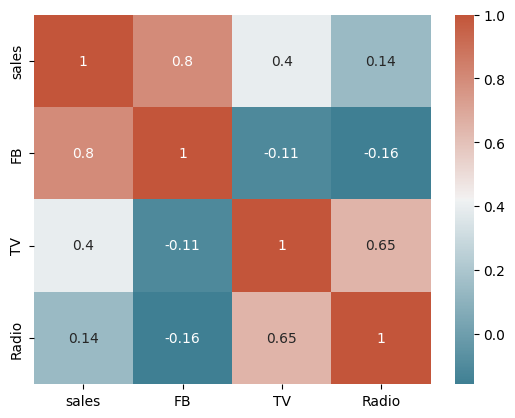

In [52]:
# Gráfico de correlação
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

Confirmamos as hipóteses sobre as correlações.

In [53]:
fig1 = px.scatter(df, x='FB', y='sales')
fig2 = px.scatter(df, x='TV', y='sales')
fig3 = px.scatter(df, x='Radio', y='sales')

In [54]:
# Correlação com Facebook
fig1.show()

In [55]:
# Correlação com TV
fig2.show()

In [56]:
# Correlação com Radio
fig3.show()

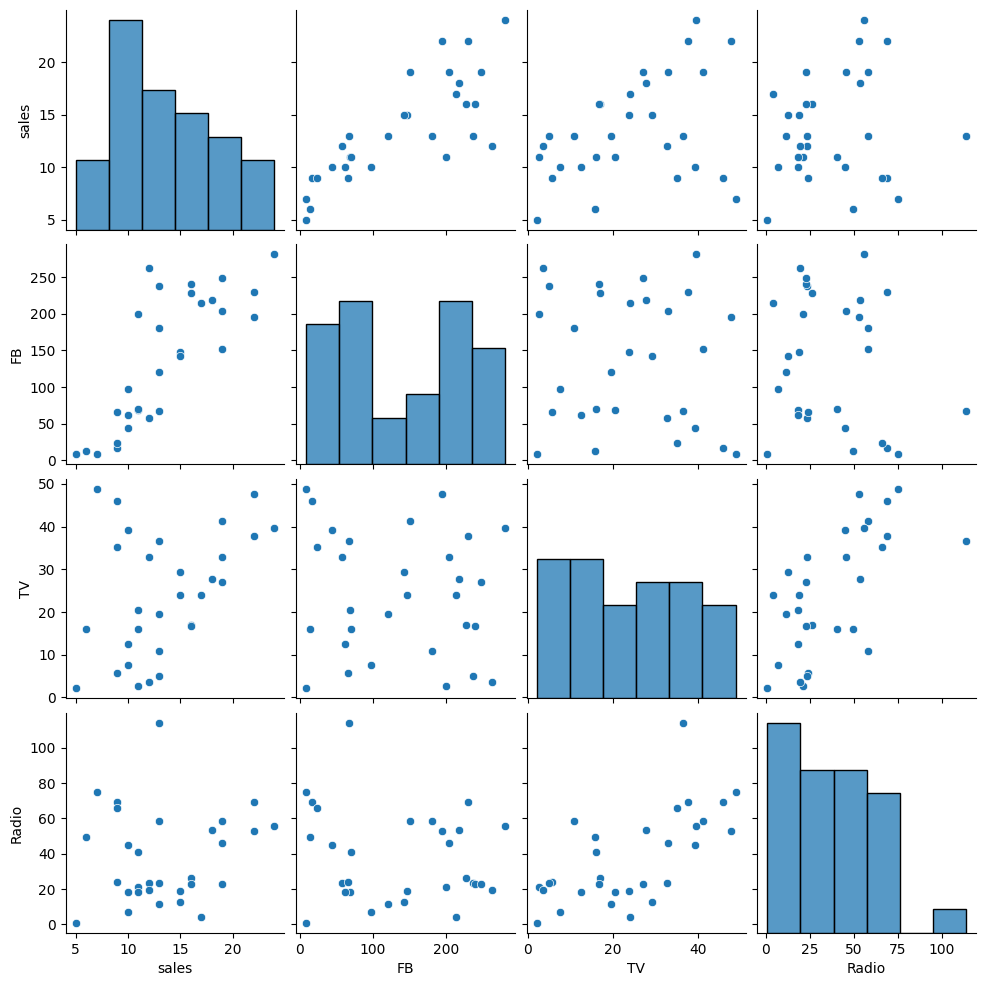

In [57]:
# Opção 2 de gráfico
sns.pairplot(df)

Nos gráficos, fica evidente o padrão que havia sido observado anteriormente. A variável "Radio" apresenta a maior dispersão e é aquela que menos segue uma linha reta em relação às vendas ("sales"). A variável "TV" mostra um ajuste um pouco melhor, enquanto o "Facebook" é o que apresenta uma distribuição mais adequada em relação às vendas.

# **Mínimos Quadrados Ordinários (Ols)**

In [58]:
inputs = ['FB', 'TV', 'Radio']

X= df[inputs]
y= df['sales']
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
 
# printing o summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     60.60
Date:                Wed, 31 May 2023   Prob (F-statistic):           7.25e-12
Time:                        19:00:43   Log-Likelihood:                -58.368
No. Observations:                  30   AIC:                             124.7
Df Residuals:                      26   BIC:                             130.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3613      0.909      3.697      0.0

Esse modelo representa uma regressão linear utilizando a técnica de Mínimos Quadrados Ordinários (OLS) para analisar a variável de resposta "sales" em relação a três variáveis independentes: "FB" (Facebook), "TV" e "Radio".

Analisaremos aqui R-quadrado, R-quadrado ajustado, Estatística F, Coeficientes (coef) de cada variável indente, valores p (P>|t|), valor p de Jarque-Bera, Skewness e Kurtosis.

Os principais resultados do modelo são os seguintes:

- R-quadrado (R-squared): O valor de R-quadrado é 0.875, o que indica que aproximadamente 87.5% da variabilidade da variável de resposta "sales" é explicada pelas variáveis independentes incluídas no modelo.

- R-quadrado ajustado (Adj. R-squared): O valor de R-quadrado ajustado é 0.860, que leva em consideração o número de variáveis independentes e os graus de liberdade do modelo. Essa medida é uma versão corrigida do R-quadrado e ajuda a evitar superestimação do poder explicativo do modelo.

- Estatística F (F-statistic): A estatística F é usada para testar a significância global do modelo. Nesse caso, o valor da estatística F é 60.60, com um valor p extremamente baixo (7.25e-12), indicando que o modelo é estatisticamente significativo.

- Coeficientes (coef): Os coeficientes representam a estimativa da contribuição de cada variável independente no valor da variável de resposta. No caso, o coeficiente para "FB" é 0.0461, para "TV" é 0.1808 e para "Radio" é -0.0137. Esses valores indicam as mudanças esperadas em "sales" para cada unidade de mudança nas variáveis independentes, mantendo as outras variáveis constantes.

- Valores p (P>|t|): Os valores p estão associados a cada coeficiente e indicam a significância estatística de cada variável independente. Quanto menor o valor p, mais significativa é a relação da variável com a variável de resposta. No caso, as variáveis ("FB" e "TV") têm valores p abaixo de 0.05, indicando uma significância estatística.

- O valor p do teste Jarque-Bera (JB) é de 0.100. Com um nível de significância de 0.05, não temos evidências suficientes para afirmar que os resíduos não seguem uma distribuição normal.

- O valor de Skewness(Skew) é -0.941. Skewness mede a assimetria da distribuição dos resíduos. Um valor próximo de zero indica que a distribuição é aproximadamente simétrica. Neste caso, o valor negativo sugere uma leve assimetria negativa, indicando que a cauda esquerda da distribuição é ligeiramente mais longa do que a cauda direita.

- O valor de Kurtosis é 3.363. Kurtosis mede a forma da distribuição dos resíduos. Um valor de kurtosis de 3 é considerado normal (mesocúrtico), indicando uma distribuição similar à distribuição normal. Neste caso, o valor de kurtosis acima de 3 sugere uma distribuição com maior concentração na região central e caudas um pouco mais pesadas do que a distribuição normal.

Em resumo, esse modelo de regressão linear indica que as variáveis "FB" (Facebook) e "TV" têm uma relação positiva e significativa com as vendas ("sales"), enquanto a variável "Radio" não apresenta uma relação significativa. No entanto, é importante interpretar os resultados considerando também o contexto específico do problema e as limitações dos pressupostos da regressão linear.

Devido ao problema de normalidade dos resíduos e à falta de significância da variável "Radio", vamos realizar um novo teste utilizando apenas as variáveis que são estatisticamente significativas. O objetivo é criar um modelo que inclua apenas os canais/variáveis que realmente estão exercendo influência nas vendas ("sales").

In [59]:
inputs = ['FB', 'TV']

X= df[inputs]
y= df['sales']
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     91.84
Date:                Wed, 31 May 2023   Prob (F-statistic):           9.01e-13
Time:                        19:00:43   Log-Likelihood:                -58.729
No. Observations:                  30   AIC:                             123.5
Df Residuals:                      27   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1774      0.873      3.639      0.0

Comparando com o modelo anterior, este novo modelo de regressão linear também utiliza a técnica de Mínimos Quadrados Ordinários (OLS) para analisar a variável de resposta "sales" em relação a duas variáveis independentes: "FB" (Facebook) e "TV".

Analisaremos aqui R-quadrado, R-quadrado ajustado, Estatística F, Coeficientes (coef) de cada variável indente, valores p (P>|t|), valor p de Jarque-Bera, Skewness e Kurtosis.

Os principais resultados deste novo modelo são os seguintes:

- R-quadrado (R-squared): O valor de R-quadrado é 0.872, o que indica que aproximadamente 87.2% da variabilidade da variável de resposta "sales" é explicada pelas variáveis independentes incluídas no modelo. Comparativamente, o R-quadrado é ligeiramente menor em relação ao modelo anterior.

- R-quadrado ajustado (Adj. R-squared): O valor de R-quadrado ajustado é 0.862, indicando que cerca de 86.2% da variabilidade é explicada pelas variáveis independentes ajustadas pelos graus de liberdade do modelo.

- Estatística F (F-statistic): A estatística F é utilizada para testar a significância global do modelo. Neste caso, o valor da estatística F é 91.84, com um valor p muito baixo (9.01e-13), indicando que o modelo é altamente significativo.

- Coeficientes (coef): Os coeficientes estimados são 0.0464 para "FB" e 0.1650 para "TV". Esses valores indicam as mudanças esperadas nas vendas ("sales") para cada unidade de mudança nas variáveis independentes, mantendo as outras variáveis constantes. Comparativamente, os coeficientes para "FB" e "TV" são semelhantes aos do modelo anterior.

- Valores p (P>|t|): Ambas as variáveis independentes ("FB" e "TV") têm valores p muito baixos, indicando uma significância estatística forte.

- O valor p do teste Jarque-Bera (JB) é de 0.0686. Com um nível de significância de 0.05, não teríamos evidências suficientes para rejeitar a hipótese de normalidade dos resíduos.

- O valor de Skewness é -1.014. Isso indica uma assimetria negativa na distribuição dos resíduos. Uma assimetria negativa significa que a cauda esquerda da distribuição é mais longa do que a cauda direita, o que sugere uma distribuição com valores extremos mais baixos.

- O valor de Kurtosis é 3.421. Isso sugere uma distribuição leptocúrtica, ou seja, com caudas mais pesadas e maior concentração de dados ao redor da média. Valores de kurtosis acima de 3 indicam uma distribuição com caudas mais pesadas do que a distribuição normal.




Comparando com o modelo anterior, esse novo modelo apresenta um R-quadrado ligeiramente menor, indicando que as variáveis independentes explicam um pouco menos da variabilidade das vendas. No entanto, o modelo é estatisticamente significativo, e as variáveis "FB" e "TV" continuam a ser significativas para prever as vendas.

# **Avaliação detalhada dos pressupostos da Regressão Linear Múltipla**

## Linearidade

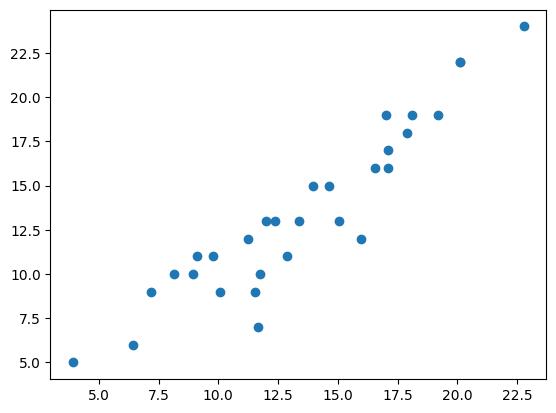

In [60]:
# Verificar se a relação entre as variáveis independentes e a variável dependente é linear
plt.scatter(result.fittedvalues, y)
# ou calcular a correlação entre os valores ajustados e os valores reais como fizemos anteriomente

Podemos observar linearidade e ausência de outliers significativos.

## Independência dos resíduos

In [61]:
# Verificar se os resíduos (erros) não possuem correlação entre si
# Você pode plotar um gráfico de resíduos versus os valores ajustados
#plt.scatter(result.fittedvalues, result.resid)
dw_statistic = durbin_watson(result.resid)
dw_statistic

2.2161733013604548

O valor calculado para a estatística de teste de Durbin-Watson foi 2.2161733013604548. No teste de Durbin-Watson, o valor da estatística varia entre 0 e 4.

Interpretação do valor da estatística de teste de Durbin-Watson:

Valor próximo de 2: Indica ausência de autocorrelação nos resíduos, o que é desejável.
Valor menor que 2: Indica a presença de autocorrelação positiva nos resíduos.
Valor maior que 2: Indica a presença de autocorrelação negativa nos resíduos.

Nesse caso, o valor calculado foi 2.2161733013604548, que está próximo de 2. Isso sugere que não há evidências fortes de autocorrelação nos resíduos, o que é uma boa notícia. Um valor próximo de 2 indica que a suposição de independência dos resíduos pode ser razoavelmente atendida.

## Homocedasticidade

Valor da estatística de teste: 1.0031408762945493
Valor-p: 0.6055788883717507


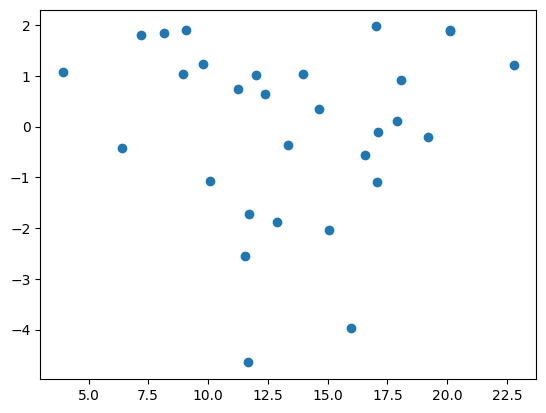

In [62]:
# Verificar se a variância dos resíduos é constante para todos os níveis das variáveis independentes
# Você pode plotar um gráfico de resíduos versus os valores ajustados ou versus cada variável independente
plt.scatter(result.fittedvalues, result.resid)
# ou realizar um teste estatístico formal para homocedasticidade, como o teste de Breusch-Pagan (result.breusch_pagan())
# Calcular o teste de Breusch-Pagan para heterocedasticidade
bp_test = het_breuschpagan(result.resid, result.model.exog)
# Imprimir os resultados
print(f"Valor da estatística de teste: {bp_test[0]}")
print(f"Valor-p: {bp_test[1]}")

Valor da estatística de teste: A estatística de teste é calculada para comparar com um valor crítico. Se a estatística de teste for maior que o valor crítico, isso indica a presença de heterocedasticidade nos resíduos. Nesse caso, o valor da estatística de teste é 1.0031408762945493, que é menor que o valor crítico. Isso sugere que não há evidências significativas de heterocedasticidade nos resíduos.

Valor-p: O valor-p é uma medida estatística que indica a probabilidade de obter uma estatística de teste igual ou mais extrema do que a observada, sob a hipótese nula de não haver heterocedasticidade. Um valor-p maior que um nível de significância escolhido (geralmente 0,05 ou 0,01) sugere que não há evidências suficientes para rejeitar a hipótese nula. Nesse caso, o valor-p é 0.6055788883717507, que é maior que 0.05. Isso indica que não há evidências significativas para rejeitar a hipótese nula de não haver heterocedasticidade.

Com base nos resultados obtidos, não há evidências significativas de heterocedasticidade nos resíduos do modelo de regressão. Isso significa que a suposição de homocedasticidade (variância constante dos erros) pode ser considerada válida para o modelo. 

## Normalidade dos resíduos

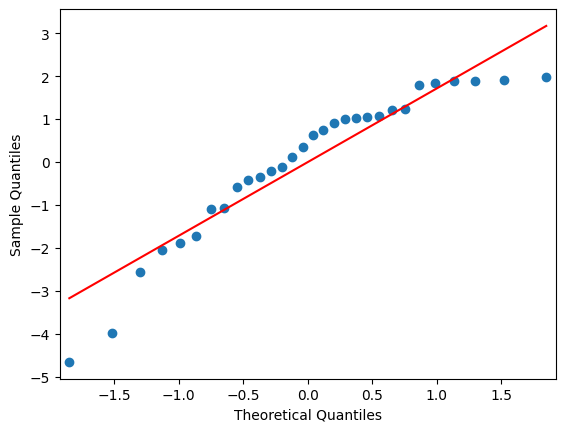

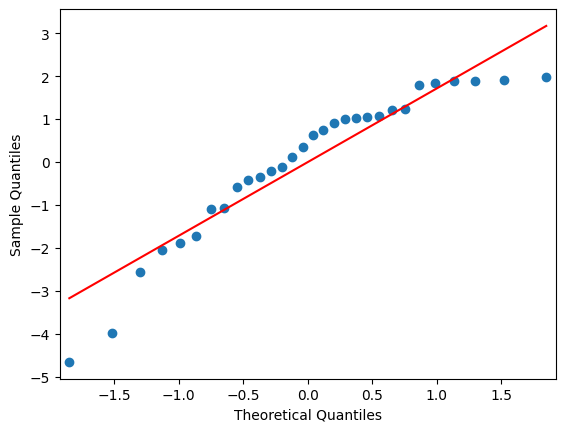

In [63]:
# Verificar se os resíduos seguem uma distribuição normal
# Podemos plotar um histograma dos resíduos ou um gráfico de probabilidade normal dos resíduos
sm.qqplot(result.resid, line='s')
# ou realizar um teste estatístico formal para normalidade, como o teste de Jarque-Bera (result.diagn)

In [64]:
# Calcular o teste de Jarque-Bera para normalidade dos resíduos
jb_test = jarque_bera(result.resid)

# Imprimir os resultados
print(f"Valor da estatística de teste: {jb_test[0]}")
print(f"Valor-p: {jb_test[1]}")

Valor da estatística de teste: 5.358384788806935
Valor-p: 0.06861854850667251


Valor da estatística de teste: A estatística de teste é calculada com base nas medidas de assimetria e curtose dos resíduos. Quanto maior for o valor da estatística de teste, mais os resíduos se desviam da normalidade. No seu caso, o valor da estatística de teste é 5.358384788806935. Um valor maior indica uma maior divergência dos resíduos em relação à normalidade.

Valor-p: O valor-p é uma medida estatística que indica a probabilidade de obter uma estatística de teste igual ou mais extrema do que a observada, sob a hipótese nula de que os resíduos seguem uma distribuição normal. Um valor-p menor que um nível de significância escolhido (geralmente 0,05 ou 0,01) sugere que há evidências suficientes para rejeitar a hipótese nula e concluir que os resíduos não seguem uma distribuição normal. No seu caso, o valor-p é 0.06861854850667251, que é maior que 0.05. Isso indica que não há evidências suficientes para rejeitar a hipótese nula de que os resíduos seguem uma distribuição normal.

Com base nos resultados obtidos, não há evidências suficientes para rejeitar a hipótese nula de que os resíduos seguem uma distribuição normal. 

## Multicolinearidade

In [65]:
# Verificar se as variáveis independentes não estão altamente correlacionadas entre si
# Você pode calcular a matriz de correlação entre as variáveis independentes
X.corr()


,const,FB,TV
const,NaN,NaN,NaN
FB,NaN,1.000000,-0.106758
TV,NaN,-0.106758,1.000000


In [66]:
# Obter os resíduos do modelo
residuals = result.resid

# Calcular o VIF para cada variável independente
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir o resultado
print(vif)

  Variável       VIF
0    const  7.010316
1       FB  1.011529
2       TV  1.011529


Como valores de VIF acima de 5 ou 10 são frequentemente considerados indicativos de multicolinearidade. Não há indícios de multicolinearidade problemática entre as variáveis independentes "FB" e "TV".

# **Regressão Linear**

In [67]:
# Apenas com os dois canais

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.5) # shuffle=False para não "embaralhar os dados"

model = LinearRegression()

model.fit(X_train, y_train)
print(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)

0.8852707384190358 0.7585913209805945


O coeficiente de determinação é uma medida que indica a proporção da variância da variável de saída que é explicada pelo modelo. Neste caso, o valor de R² para o conjunto de treinamento é 0.8852707384190358, o que significa que o modelo explica aproximadamente 88.53% da variabilidade nos dados de treinamento. Já o valor de R² para o conjunto de teste é 0.7585913209805945, indicando que o modelo explica aproximadamente 75.86% da variabilidade nos dados de teste.

In [68]:
# Coeficientes da regressão
model.coef_

array([0.        , 0.05432613, 0.1286808 ])

In [69]:
model.intercept_

3.131964924715666

In [70]:
X.columns

Index(['const', 'FB', 'TV'], dtype='object')

In [71]:
df['prediction']= model.predict(X)

# Deixando apenas sales e prediction é possível ver a precisão das previsões
fig = px.line(df, x='Time', y=df.columns)
fig.show()


# **Calculo do CPL (Cost per lead)**

In [72]:
fb= 1/0.05
fb

20.0

In [73]:
tv= 1/0.12
tv

8.333333333333334

# **Random Forest Regressor + feature_importances**

**Para verificar o desempenho do modelo e explorar a importância das variáveis, iremos criar um novo modelo. No entanto, como a função feature_importances não está disponível na classe LinearRegression, precisaremos utilizar outro tipo de modelo que possua essa função. Dessa forma, poderemos calcular a importância relativa das variáveis e plotar um gráfico para visualizá-la..**

In [74]:
modelRFR = RandomForestRegressor()
modelRFR.fit(X_train, y_train)

RandomForestRegressor()

<Axes: >

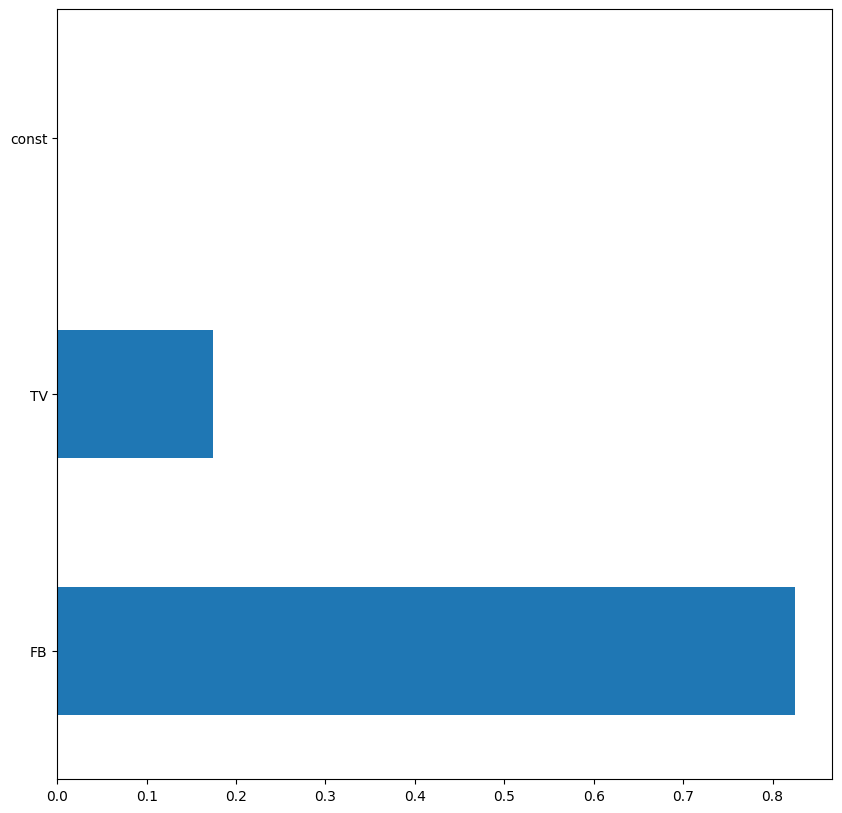

In [75]:
feat_importances = pd.Series(modelRFR.feature_importances_, index = X.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 10))

In [76]:
print(
    modelRFR.score(X_train, y_train),
    modelRFR.score(X_test, y_test)
)

0.957388 0.7903277229845626


Temos um desempenho "ok" considerando que temos poucos dados. Caso permitissimos aleatóriedade no shuffle do train_test_split poderíamos até conseguir melhor desempenho nos testes.